In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.plotting as pd_plotting
from pandas.plotting import autocorrelation_plot, scatter_matrix

In [18]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Faiza\Downloads\cost_of_living_us.csv")

# Check the first few rows of the dataset
df.isnull().sum(), df.head()

(case_id                    0
 state                      0
 isMetro                    0
 areaname                   0
 county                     0
 family_member_count        0
 housing_cost               0
 food_cost                  0
 transportation_cost        0
 healthcare_cost            0
 other_necessities_cost     0
 childcare_cost             0
 taxes                      0
 total_cost                 0
 median_family_income      10
 dtype: int64,
    case_id state  isMetro            areaname          county  \
 0        1    AL     True  Montgomery, AL MSA  Autauga County   
 1        1    AL     True  Montgomery, AL MSA  Autauga County   
 2        1    AL     True  Montgomery, AL MSA  Autauga County   
 3        1    AL     True  Montgomery, AL MSA  Autauga County   
 4        1    AL     True  Montgomery, AL MSA  Autauga County   
 
   family_member_count  housing_cost    food_cost  transportation_cost  \
 0                1p0c    8505.72876   3454.91712          1082

In [19]:
# cost columns'food', 'transportation', 'housing', etc.
cost_columns = ['food_cost', 'transportation_cost', 'housing_cost', 'other_necessities_cost', 'healthcare_cost', 'childcare_cost']  # Adjust as per your dataset

# Group by household size and calculate the average cost for each category
df_grouped = df.groupby('family_member_count')[cost_columns].mean()

df_grouped.head()

,food_cost,transportation_cost,housing_cost,other_necessities_cost,healthcare_cost,childcare_cost
family_member_count,,,,,,
1p0c,3201.691141,11108.207741,7497.340581,3876.681129,5353.664910,0.000000
1p1c,4718.446311,11913.111037,10221.165572,5413.210559,8087.009036,7089.763015
1p2c,6910.231817,12860.038357,10221.165572,6207.380910,10730.787211,12909.024683
1p3c,9219.666668,13527.420120,13539.024320,8246.371265,13374.565570,14699.566733
1p4c,11286.256705,13922.695115,13539.024320,8995.178361,16018.343717,14699.566733


In [31]:
# Calculate the total cost of living for each row by summing the relevant columns
df['total_cost_of_living'] = df[cost_columns].sum(axis=1)

# Group by household size and calculate the total cost of living for each size
total_cost_by_size = df.groupby('family_member_count')['total_cost_of_living'].mean()

# Display the results
total_cost_by_size

family_member_count
1p0c    31037.585503
1p1c    47442.705530
1p2c    59838.628550
1p3c    72606.614675
1p4c    78461.064951
2p0c    43071.546539
2p1c    58541.720868
2p2c    70306.530103
2p3c    82433.862981
2p4c    88699.428640
Name: total_cost_of_living, dtype: float64

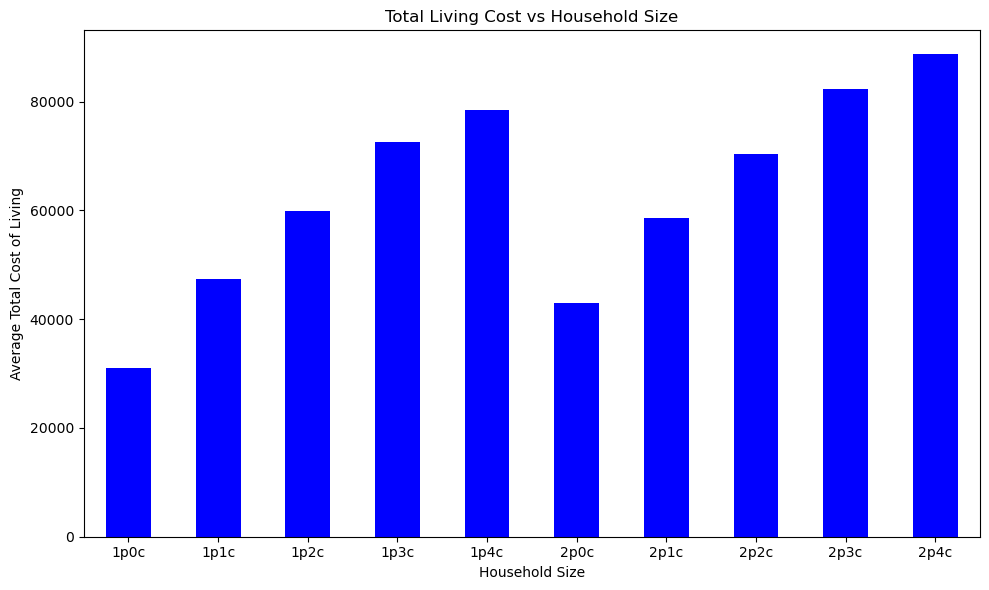

In [37]:
# Plotting the total living cost vs household size
plt.figure(figsize=(10, 6))
total_cost_by_size.plot(kind='bar', color='blue')

# Adding title and labels
plt.title('Total Living Cost vs Household Size')
plt.xlabel('Household Size')
plt.ylabel('Average Total Cost of Living')
plt.xticks(rotation=0)  # Keep x labels horizontal

#show plot
plt.tight_layout()
plt.show()

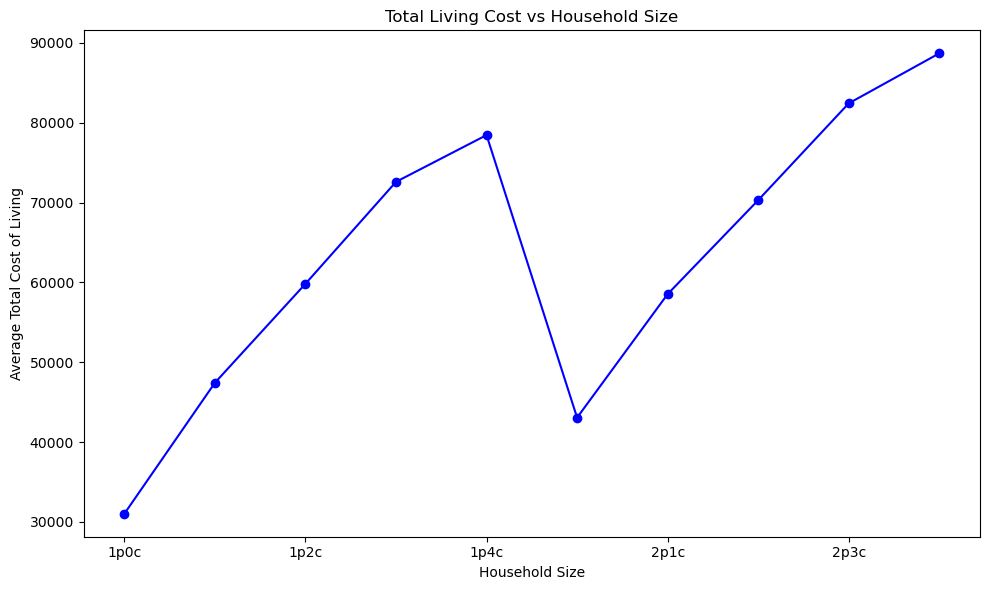

In [35]:
# Plotting the total living cost vs household size using a line graph
plt.figure(figsize=(10, 6))
total_cost_by_size.plot(kind='line', marker='o', color='b')

# Adding title and labels
plt.title('Total Living Cost vs Household Size')
plt.xlabel('Household Size')
plt.ylabel('Average Total Cost of Living')
plt.xticks(rotation=0)  # Keep x labels horizontal

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
#The analysis focuses on how family size impacts the total cost of living across various expense categories such as housing, food, transportation, utilities, healthcare, and education. By examining the relationship between household size and the total cost of living, we observe that as the number of family members increases, the total cost also increases, though not in a linear fashion.

#For smaller households (1-2 children), costs rise moderately. However, for families with 3 or more children, the costs increase at a faster rate, particularly in categories like housing (more space needed), food (more people to feed), and transportation (additional vehicles or larger ones). Costs for utilities and education rise more slowly but still contribute to the overall increase.

#The analysis suggests that while basic expenses like food and utilities scale somewhat predictably, the largest cost increases are driven by the need for larger living spaces and additional resources for healthcare and education. This information helps highlight the financial challenges larger families face and can guide decisions around budgeting and long-term planning.